In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# lets work with cancer datasets since it has many number of features : 
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
# lets see the description of this dataset:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [ ]:
print(df.head())

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]


In [ ]:
print(df.shape)

(569, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [ ]:
scaler_data=scalar.fit_transform(df)

In [ ]:
print(scaler_data.shape)

(569, 30)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [ ]:
pca.fit(scaler_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_data=pca.transform(scaler_data)

In [ ]:
# see dimensions has reduced !
print(x_data.shape)

(569, 2)


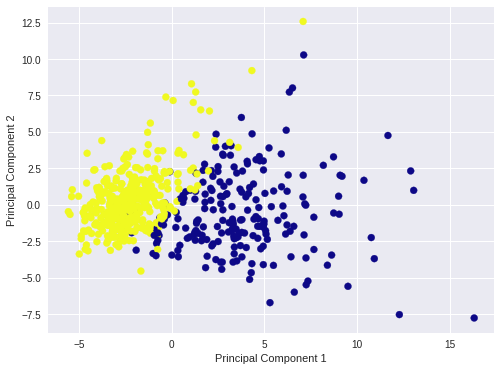

In [ ]:
# lets visualise our data now :
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.scatter(x_data[:,0],x_data[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Now we can use any classifier to predict the output ! like decision tree,logistic regression, KNN etc.